In [1]:
import math # Functions beyond the basic maths



# Import an entire library and give it an alias
import pandas as pd # For DataFrame and handling
import numpy as np # Array and numerical processing
import matplotlib.pyplot as plt # Low level plottingsource .venv/bin/activate
import seaborn as sns # High level Plotting
import statsmodels.api as sm # Modeling, e.g. ANOVA
import plotly.express as px

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
## loading  dataset
df_2017 = pd.read_csv("data/2017.csv")
df_2018 = pd.read_csv("data/2018.csv")
df_2019 = pd.read_csv("data/2019.csv")

In [8]:
## Clean data and rename some column to easier to join.
df_2017['year'] = 2017
df_2018['year'] = 2018
df_2019['year'] = 2019

In [9]:
df_2017.rename({'Happiness.Rank': 'Rank',
'Happiness.Score':'Score',
'Economy..GDP.per.Capita.':'Economy',
'Health..Life.Expectancy.':'Healthy',
'Freedom to make life choices':'Freedom',
'Trust..Government.Corruption.':'Government corruption'}, axis=1, inplace=True)



,Country,Rank,Score,Whisker.high,Whisker.low,Economy,Family,Healthy,Freedom,Generosity,Government corruption,Dystopia.Residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [10]:
df_2018.rename({'Overall rank': 'Rank',
'GDP per capita':'Economy',
'Healthy life expectancy':'Healthy',
'Freedom to make life choices':'Freedom',
'Perceptions of corruption':'Government corruption'}, axis=1, inplace=True)
df_2018.head()


,Rank,Country or region,Score,Economy,Social support,Healthy,Freedom,Generosity,Government corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [11]:

df_2019.rename({'Overall rank': 'Rank',
'GDP per capita':'Economy',
'Healthy life expectancy':'Healthy',
'Freedom to make life choices':'Freedom',
'Perceptions of corruption':'Government corruption'}, axis=1, inplace=True)
df_2019.head()

,Rank,Country or region,Score,Economy,Social support,Healthy,Freedom,Generosity,Government corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [13]:
## Combine df_2019, df_2018, and  df_2017
df_join = pd.concat([df_2018, df_2019,df_2017])

,Rank,Country or region,Score,Economy,Social support,Healthy,Freedom,Generosity,Government corruption,year,Country,Whisker.high,Whisker.low,Family,Dystopia.Residual
0,1,Finland,7.632,1.305000,1.592,0.874000,0.681000,0.202000,0.393000,2018,NaN,NaN,NaN,NaN,NaN
1,2,Norway,7.594,1.456000,1.582,0.861000,0.686000,0.286000,0.340000,2018,NaN,NaN,NaN,NaN,NaN
2,3,Denmark,7.555,1.351000,1.590,0.868000,0.683000,0.284000,0.408000,2018,NaN,NaN,NaN,NaN,NaN
3,4,Iceland,7.495,1.343000,1.644,0.914000,0.677000,0.353000,0.138000,2018,NaN,NaN,NaN,NaN,NaN
4,5,Switzerland,7.487,1.420000,1.549,0.927000,0.660000,0.256000,0.357000,2018,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,NaN,3.471,0.368746,NaN,0.326425,0.581844,0.252756,0.455220,2017,Rwanda,3.543030,3.398970,0.945707,0.540061
151,152,NaN,3.462,0.777153,NaN,0.500533,0.081539,0.493664,0.151347,2017,Syria,3.663669,3.260331,0.396103,1.061574
152,153,NaN,3.349,0.511136,NaN,0.364509,0.390018,0.354256,0.066035,2017,Tanzania,3.461430,3.236570,1.041990,0.621130
153,154,NaN,2.905,0.091623,NaN,0.151611,0.059901,0.204435,0.084148,2017,Burundi,3.074690,2.735310,0.629794,1.683024


In [14]:
# Calculate the mean and standard deviation for each group.
#df1 = df_join.groupby(['year']).mean()
meanScore = df_join.groupby(['year'])['Score'].mean()
print(meanScore)
stdScore = df_join.groupby(['year'])['Score'].std()
print(stdScore)

year
2017    5.354019
2018    5.375917
2019    5.407096
Name: Score, dtype: float64
year
2017    1.131230
2018    1.119506
2019    1.113120
Name: Score, dtype: float64


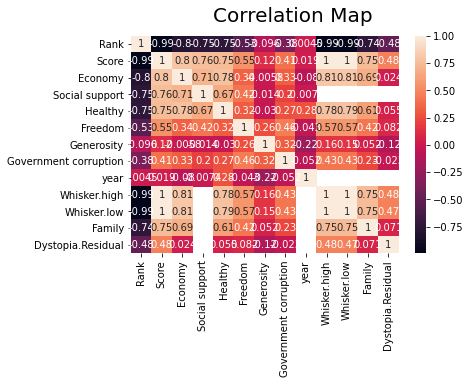

In [16]:
# corrleation data
corrMatrix = df_join.corr()
sns.heatmap(corrMatrix, annot=True)
plt.suptitle("Correlation Map", fontsize=20)
plt.show()

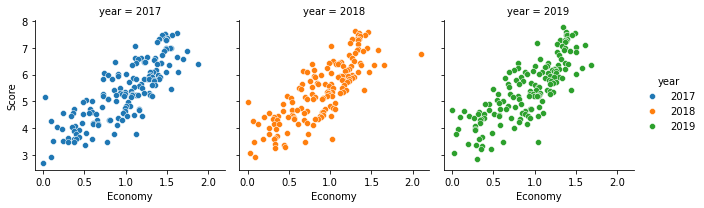

In [17]:
## Happiness Score Vs Economy
p1 = sns.FacetGrid(df_join, col = "year", hue = "year", col_wrap=3)
p1.map(sns.scatterplot, "Economy", "Score")
p1.add_legend()
plt.show()

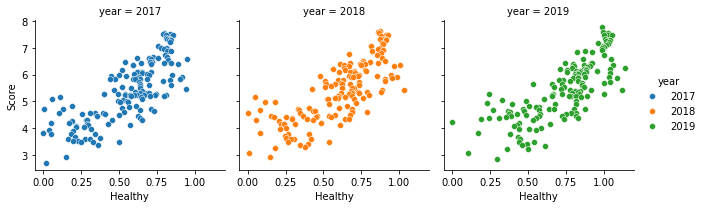

In [18]:
 #Happiness Score Vs Healthy

p2 = sns.FacetGrid(df_join, col = "year", hue = "year", col_wrap=3)
p2.map(sns.scatterplot, "Healthy", "Score")
p2.add_legend()
plt.show()

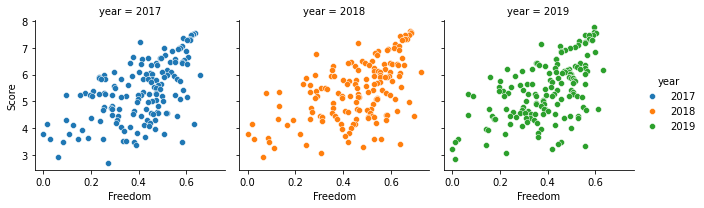

In [20]:

# Happiness Score Vs  Freedom
p3 = sns.FacetGrid(df_join, col = "year", hue = "year", col_wrap=3)
p3.map(sns.scatterplot, "Freedom", "Score")
p3.add_legend()
plt.show()

In [22]:
#Calculate a 1-way ANOVA
from statsmodels.formula.api import ols
lm = ols('Score ~ year', data=df_join).fit()
anovatest = sm.stats.anova_lm(lm)

ModuleNotFoundError: No module named 'statsmodels'